In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding,GRU,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Input

In [2]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = 10000)

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [9]:
input_layer = Input(shape=(100,))
embedding_layer = Embedding(10000, 32)(input_layer)
GRU_layer1 = GRU(64, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.5)(GRU_layer1)
GRU_layer2 = GRU(32, return_sequences=False)(dropout_layer) 
output_layer = Dense(1, activation='sigmoid')(GRU_layer2)
model = Model(input_layer, output_layer)

In [10]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 100, 64)        │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348,257 (1.33 MB)

 Trainable params: 348,257 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile('rmsprop', 'binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data = (X_test,y_test))

Epoch 1/10


782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 166ms/step - acc: 0.6626 - loss: 0.5816 - val_acc: 0.8324 - val_loss: 0.3790
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - acc: 0.8653 - loss: 0.3234 - val_acc: 0.8517 - val_loss: 0.3419
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - acc: 0.8876 - loss: 0.2829 - val_acc: 0.8550 - val_loss: 0.3415
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 168ms/step - acc: 0.9067 - loss: 0.2383 - val_acc: 0.8517 - val_loss: 0.3645
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - acc: 0.9189 - loss: 0.2141 - val_acc: 0.8557 - val_loss: 0.3546
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 152ms/step - acc: 0.9320 - loss: 0.1904 - val_acc: 0.8476 - val_loss: 0.3520
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - acc: 0.9390 - loss: 0.1682 - val_acc: 0.8349 - val_loss: 0.4121
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - acc: 0.9480 - loss: 0.1472 - val_acc: 0.8372 - val_loss: 0.5274
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━

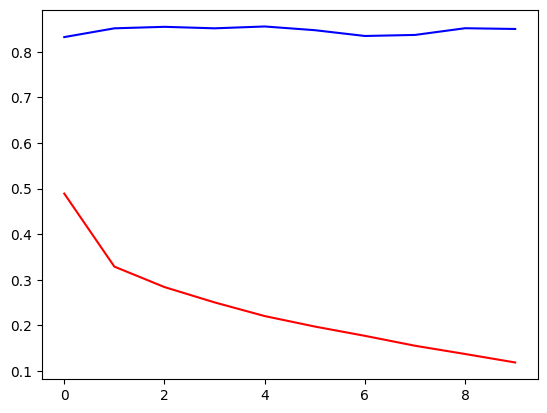

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'loss',color = 'red')
plt.plot(history.history['val_acc'],label = 'val_accuracy',color = 'blue')